# AI - Keras through TensorFlow

# Import

In [40]:
import tensorflow as tf 
from tensorflow import keras 
from keras.layers import Input, Dense, TimeDistributed
import numpy as np


# Sommaire

[I. Understanding Keras layers](#Partie1)

[II. Using the Keras Sequential API](#Partie2)

[III. Using the Keras Functional API](#Partie3)

[IV. Using the Keras Subclassing API](#Partie4)

## I. Understanding Keras layers<a class="anchor" id="Partie1"></a>

Keras layers are the fundamental building blocks of Keras models. 
Each layer receives data as input, does a specific task, and returns an output.
Keras includes a wide range of built-in layers: 

- Core layers: Dense, Activation, Flatten, Input, Reshape, Permute, RepeatVector, SpatialDropOut, and many more. 
- Convolutional layers for Convolutional Neural Networks: Conv1D, Conv2D, SeparableConv1D, Conv3D, Cropping2D, and many more. 
- Pooling layers that perform a downsampling operation to reduce feature maps: MaxPooling1D, AveragePooling2D, and GlobalAveragePooling3D. 
- Recurrent layers for recurrent neural networks to process recurrent or sequence data: RNN, SimpleRNN, GRU, LSTM, ConvLSTM2D, etc.
- The embedding layer, only used as the first layer in a model and turns positive integers into dense vectors of fixed size.
-  Merge layers: Add, Subtract, Multiply, Average, Maximum, Minimum, and many more. 
- Advanced activation layers: LeakyReLU, PReLU, Softmax, ReLU, etc. 
- The batch normalization layer, which normalizes the activation of the previous layer at each batch. f Noise layers: GausianNoise, GausianDropout, and AlphaDropout. 
- Layer wrappers: TimeDistributed applies a layer to every temporal slice of an input and bidirectional wrapper for RNNs. 
- Locally-connected layers: LocallyConnected1D and LocallyConnected2D. They work like Conv1D or Conv2D without sharing their weights.

On génère des sets random pour utiliser nos modèles.

In [41]:
data = np.random.random((2000, 64))
labels = np.random.random((2000, 10))
val_data = np.random.random((500, 64))
val_labels = np.random.random((500, 10))
test_data = np.random.random((500, 64))
test_labels = np.random.random((500, 10))
mnist = tf.keras.datasets.mnist
(X_mnist_train, y_mnist_train),(X_mnist_test, y_mnist_test) = mnist.load_data()
train_mnist_features = X_mnist_train/255
test_mnist_features = X_mnist_test/255

## II. Using the Keras Sequential API<a class="anchor" id="Partie2"></a>

L'objectif principal de Keras est de faciliter la création de modèles d'apprentissage profond. L'API séquentielle nous permet de créer des modèles séquentiels, qui sont une pile linéaire de couches. Les modèles qui sont connectés couche par couche peuvent résoudre de nombreux problèmes. Pour créer un modèle séquentiel, nous devons créer une instance d'une classe Sequential, créer quelques couches de modèle et les ajouter à celle-ci.

Tout d'abord, une première méthode est de fournir une liste de couche au constructeur Sequential. 
Nous allons construire un classificateur multi-classes (10 catégories), un modèle entièrement connecté, un perceptron multi-couches.

In [42]:
model = tf.keras.Sequential([
    # Add a fully connected layer with 1024 units to the model
    tf.keras.layers.Dense(1024, input_dim=64),
    # Add an activation layer with ReLU activation function
    tf.keras.layers.Activation('relu'),
    # Add a fully connected layer with 256 units to the model
    tf.keras.layers.Dense(256),
    # Add an activation layer with ReLU activation function
    tf.keras.layers.Activation('relu'),
    # Add a fully connected layer with 10 units to the model
    tf.keras.layers.Dense(10),
    # Add an activation layer with softmax activation function
    tf.keras.layers.Activation('softmax')])

Une autre façon de créer un modèle séquentiel consiste à instancier une classe Sequential, puis à ajouter des couches via la méthode .add().

In [43]:
model = tf.keras.Sequential()
# Add a fully connected layer with 1024 units to the model
model.add(tf.keras.layers.Dense(1024, input_dim=64))
# Add an activation layer with ReLU activation function
model.add(tf.keras.layers.Activation('relu'))
# Add a fully connected layer with 256 units to the model
model.add(tf.keras.layers.Dense(256))
# Add an activation layer with ReLU activation function
model.add(tf.keras.layers.Activation('relu'))
# Add a fully connected Layer with 10 units to the model
model.add(tf.keras.layers.Dense(10))
# Add an activation layer with softmax activation function
model.add(tf.keras.layers.Activation('softmax'))

Nous pouvons ajouter une **fonction d'activation** en spécifiant le nom d'une fonction intégrée ou en tant qu'objet appelable. Cette fonction décide si un neurone doit être activé ou non. Par défaut, une couche n'a pas de fonction d'activation, c'est pourquoi une manière plus "orthodoxe" d'ajouter une couche d'activation est de directement ajouter une layer d'activation pour pouvoir facilement interagir avec. 

In [44]:
# Creation of a dense layer with a sigmoid activation  function:
Dense(256, activation='sigmoid')
# Or:
Dense(256, activation=tf.keras.activations.sigmoid)

Nous pouvons également spécifier une **stratégie d'initialisation** pour les poids initiaux (noyau et biais) en passant l'identité de la chaîne des initialisateurs intégrés ou un objet appelable. Le noyau est fixé par défaut à l'initialisateur "Glorot uniform", et le biais est fixé à zéro.

In [45]:
# A dense layer with a kernel initialized to a truncated normal distribution:
Dense(256, kernel_initializer='random_normal')
# A dense layer with a bias vector initialized with a constant value of 5.0:
Dense(256, bias_initializer=tf.keras.initializers.Constant(value=5))

Nous pouvons également spécifier des **régularisateurs** pour le noyau et le biais, tels que la régularisation L1 (également appelée Lasso) ou L2 (également appelée Ridge). Par défaut, aucune régularisation n'est appliquée. Un régularisateur vise à empêcher le surentrainement en pénalisant un modèle pour avoir des poids importants. Ces pénalités sont incorporées dans la fonction de perte que le réseau optimise.

In [46]:
# A dense layer with L1 regularization of factor 0.01 applied  to the kernel matrix:
Dense(256, kernel_regularizer=tf.keras.regularizers.l1(0.01))
# A dense layer with L2 regularization of factor 0.01 applied to the bias vector:
Dense(256, bias_regularizer=tf.keras.regularizers.l2(0.01))

Avant la phase d'apprentissage, notre modèle doit être configuré. Ceci est fait par la méthode de compilation. Nous devons spécifier:

- Un algorithme d'optimisation pour l'entraînement de notre réseau neuronal. Nous pouvons transmettre une instance d'optimiseur à partir du module tf.keras.optimizers.
- Une fonction de perte appelée fonction objectif ou fonction de score d'optimisation vise à minimiser le modèle.
- Une liste de métriques utilisées pour évaluer les performances de notre modèle et qui ne sont pas utilisées dans le processus de formation du modèle.

Ensuite on effectue l'entraînement de notre modèle grâce à la méthode fit, enfin nous pouvons évaluer le modèle grâce aux critères mentionnés dans la compilation. Pour finir on peut utiliser notre modèle sur 

In [47]:
model.compile(
    optimizer="adam", 
    loss="categorical_crossentropy",
    metrics=["accuracy"]
)

model.fit(data, labels, epochs=10, batch_size=50,
          validation_data=(val_data, val_labels))

model.evaluate(data, labels, batch_size=50)

result = model.predict(data, batch_size=50)

Epoch 1/10
40/40 [==============================] - 1s 11ms/step - loss: 31.6861 - accuracy: 0.1005 - val_loss: 73.8827 - val_accuracy: 0.0940
Epoch 2/10
40/40 [==============================] - 0s 6ms/step - loss: 121.9211 - accuracy: 0.1085 - val_loss: 139.1443 - val_accuracy: 0.1160
Epoch 3/10
40/40 [==============================] - 0s 6ms/step - loss: 174.6562 - accuracy: 0.1175 - val_loss: 168.8280 - val_accuracy: 0.0860
Epoch 4/10
40/40 [==============================] - 0s 6ms/step - loss: 534.4794 - accuracy: 0.0940 - val_loss: 1165.6456 - val_accuracy: 0.1260
Epoch 5/10
40/40 [==============================] - 0s 6ms/step - loss: 1287.0070 - accuracy: 0.0885 - val_loss: 1466.0035 - val_accuracy: 0.0920
Epoch 6/10
40/40 [==============================] - 0s 6ms/step - loss: 2035.4275 - accuracy: 0.0980 - val_loss: 2063.7439 - val_accuracy: 0.0940
Epoch 7/10
40/40 [==============================] - 0s 6ms/step - loss: 2658.8420 - accuracy: 0.0940 - val_loss: 5046.7339 - val_acc

## III. Using the Keras Functional API<a class="anchor" id="Partie3"></a>

L'API séquentielle Keras est idéale pour développer des modèles d'apprentissage profond dans la plupart des situations. Cependant, cette API présente certaines limites, comme une topologie linéaire, qui pourraient être surmontées avec l'API fonctionnelle. Notez que de nombreux réseaux très performants sont basés sur une topologie non linéaire, comme Inception, ResNet, etc. 

L'API fonctionnelle permet de créer des modèles complexes avec une topologie non linéaire, des entrées multiples, des sorties multiples, des connexions résiduelles non séquentielles et des couches partagées et réutilisables. L'API fonctionnelle est un moyen de construire un DAG (directed acyclic graph) et de créer des modèles plus flexibles que l'API séquentielle tf.keras.Sequential.

Nous allons créer un nœud d'entrée avec une forme de dimension 28x28. Rappelez-vous que dans Keras, la couche d'entrée n'est pas une couche mais un tenseur, et nous devons spécifier la forme d'entrée pour la première couche. Input() est utilisé pour instancier un tenseur Keras.
On construit ci-dessous le graphe de l'entré à la sortie passant par 2 couches denses (50 et 10 neurones).

In [48]:
inputs = tf.keras.Input(shape=(28,28))
flatten_layer = keras.layers.Flatten()
flatten_output = flatten_layer(inputs)
dense_layer = tf.keras.layers.Dense(50, activation='relu')
dense_output = dense_layer(flatten_output)
predictions = tf.keras.layers.Dense(10, activation='softmax')(dense_output)

Le ou les tenseurs d'entrée et le ou les tenseurs de sortie sont utilisés pour définir un modèle. Le modèle est une fonction d'une ou plusieurs couches d'entrée et d'une ou plusieurs couches de sortie. L'instance de "model" formalise le graphe sur la façon dont les données passent de l'entrée (s) à la sortie (s).

In [49]:
model = keras.Model(inputs=inputs, outputs=predictions)
model.summary()

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 28, 28)]          0         
                                                                 
 flatten_3 (Flatten)         (None, 784)               0         
                                                                 
 dense_61 (Dense)            (None, 50)                39250     
                                                                 
 dense_62 (Dense)            (None, 10)                510       
                                                                 
Total params: 39,760
Trainable params: 39,760
Non-trainable params: 0
_________________________________________________________________


On peut maintenant compiler le modèle avec la configuration d'entraînement et de critères puis entraîner ce modèle.

In [50]:
model.compile(optimizer='sgd',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])
             
model.fit(X_mnist_train, y_mnist_train,
          validation_data=(X_mnist_train, y_mnist_train),
          epochs=10)

Epoch 1/10
1875/1875 [==============================] - 7s 3ms/step - loss: 26.3807 - accuracy: 0.1390 - val_loss: 2.3017 - val_accuracy: 0.1049
Epoch 2/10
1875/1875 [==============================] - 6s 3ms/step - loss: 2.2848 - accuracy: 0.1173 - val_loss: 2.2623 - val_accuracy: 0.1298
Epoch 3/10
1875/1875 [==============================] - 6s 3ms/step - loss: 2.2963 - accuracy: 0.1169 - val_loss: 2.3008 - val_accuracy: 0.1125
Epoch 4/10
1875/1875 [==============================] - 6s 3ms/step - loss: 2.3009 - accuracy: 0.1127 - val_loss: 2.3007 - val_accuracy: 0.1125
Epoch 5/10
1875/1875 [==============================] - 6s 3ms/step - loss: 2.3008 - accuracy: 0.1125 - val_loss: 2.3007 - val_accuracy: 0.1125
Epoch 6/10
1875/1875 [==============================] - 6s 3ms/step - loss: 2.2779 - accuracy: 0.1246 - val_loss: 2.2924 - val_accuracy: 0.2012
Epoch 7/10
1875/1875 [==============================] - 6s 3ms/step - loss: 2.2252 - accuracy: 0.1543 - val_loss: 2.3074 - val_accuracy

### Creating a model with multiple inputs and outputs

L'API fonctionnelle permet de manipuler facilement un grand nombre de flux de données entrelacés avec des entrées et des sorties multiples et des topologies de connectivité non linéaires. Ces éléments ne peuvent pas être traités avec l'API séquentielle, qui n'est pas en mesure de créer un modèle avec des couches qui ne sont pas connectées séquentiellement ou avec des entrées ou sorties multiples. 

Nous allons construire un système pour prédire le prix d'une maison spécifique et le temps écoulé avant sa vente.

Le modèle aura deux entrées : 
- Des données sur la maison telles que le nombre de chambres, la taille de la maison, la climatisation, cuisine équipée, etc. 
- Une photo récente de la maison

Ce modèle aura deux sorties : 
- Le temps écoulé avant la vente (deux catégories - lent ou rapide). 
- Le prix prédit

Pour construire ce système, nous allons commencer par construire le premier bloc pour traiter les données tabulaires sur la maison.

In [51]:
house_data_inputs = tf.keras.Input(shape=(128,), name='house_data')
x = tf.keras.layers.Dense(64, activation='relu')(house_data_inputs)
block_1_output = tf.keras.layers.Dense(32, activation='relu')(x)

Ensuite, nous construirons le deuxième bloc pour traiter les données de l'image de la maison.

In [52]:
house_picture_inputs = tf.keras.Input(shape=(128,128,3), name='house_picture')
x = tf.keras.layers.Conv2D(64, 3, activation='relu', padding='same')(house_picture_inputs)
x = tf.keras.layers.Conv2D(64, 3, activation='relu', padding='same')(x)
block_2_output = tf.keras.layers.Flatten()(x)

Maintenant, nous allons fusionner toutes les caractéristiques disponibles en un seul grand vecteur par concaténation.

In [53]:
x = tf.keras.layers.concatenate([block_1_output, block_2_output])

Ensuite, nous ajouterons à ces caractéristiques une régression logistique pour la prédiction des prix.

In [54]:
price_pred = tf.keras.layers.Dense(1, name='price', activation='relu')(x)

Et nous ajouterons une classification temporelle à ces caractéristiques.

In [55]:
time_elapsed_pred = tf.keras.layers.Dense(2, name='elapsed_time', activation='softmax')(x)

Nous pouvons maintenant construire notre modèle.

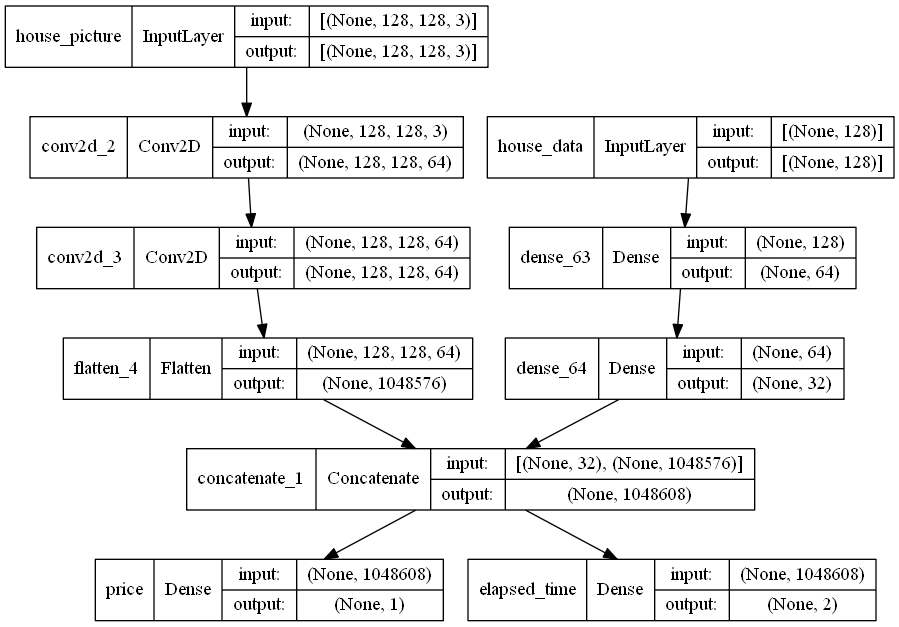

In [56]:
model = keras.Model([house_data_inputs, house_picture_inputs],
                   [price_pred, time_elapsed_pred],
                   name='toy_house_pred')

keras.utils.plot_model(model, 'multi_input_and_output_model.png',show_shapes=True)

## IV. Using the Keras Subclassing API<a class="anchor" id="Partie4"></a>

Keras est basé sur les principes de conception orientée objet. Ainsi, nous pouvons sous-classer la classe Model et créer la définition de l'architecture de notre modèle.

L'API Keras Subclassing est la troisième voie proposée par Keras pour construire des modèles de réseaux de neurones profonds. Cette API est entièrement personnalisable, mais cette flexibilité est aussi synonyme de complexité ! 

Vous vous demandez sans doute pourquoi nous avons besoin de cette API si elle est si difficile à utiliser.  Certaines architectures de modèles et certaines couches personnalisées peuvent être extrêmement difficiles. Certains chercheurs et certains développeurs espèrent avoir le contrôle total de leurs modèles et de la manière de les former. L'API de sous-classement offre ces fonctionnalités.

### Creating a custom layer

Tout d'abord créons notre couche dense customisable.

In [57]:
class MyCustomDense(tf.keras.layers.Layer):
    # Initialize this class with the number of units
    def __init__(self, units):
        super(MyCustomDense, self).__init__()
        self.units = units
 
    # Define the weights and the bias
    def build(self, input_shape):
        self.w = self.add_weight(shape=(input_shape[-1], self.units),
                            initializer='random_normal',
                            trainable=True)
                            
        self.b = self.add_weight(shape=(self.units,),
                            initializer='random_normal',
                            trainable=True)
 
    # Applying this layer transformation to the input tensor
    def call(self, inputs):
        return tf.matmul(inputs, self.w) + self.b
    
    # Function to retrieve the configuration
    def get_config(self):
        return {'units': self.units}

Ensuite, nous allons créer un modèle en utilisant la couche MyCustomDense créée à l'étape précédente

In [58]:
# Create an input layer
inputs = keras.Input((12,4))
# Add an instance of MyCustomeDense layer
outputs = MyCustomDense(2)(inputs)
# Create a model
model = keras.Model(inputs, outputs)
# Get the model config
config = model.get_config()

In [59]:
new_model = keras.Model.from_config(config,                        
                                    custom_objects={'MyCustomDense': MyCustomDense})

### Creating a custom model

In [60]:
class MyMNISTModel(tf.keras.Model):
    
    def __init__(self, num_classes):
        super(MyMNISTModel, self).__init__(name='my_mnist_model')
        self.num_classes = num_classes
        self.flatten_1 = tf.keras.layers.Flatten()
        self.dropout = tf.keras.layers.Dropout(0.1)
        self.dense_1 = tf.keras.layers.Dense(50, activation='relu')
        self.dense_2 = tf.keras.layers.Dense(10, activation='softmax')
    
    def call(self, inputs, training=False):
        x = self.flatten_1(inputs)
        # Apply dropout only during the training phase
        x = self.dense_1(x)
        if training:
            x = self.dropout(x, training=training)
        return self.dense_2(x)

In [61]:
my_mnist_model = MyMNISTModel(10)
# Compile
my_mnist_model.compile(optimizer='sgd',
                      loss='sparse_categorical_crossentropy',
                      metrics=['accuracy'])
# Train
my_mnist_model.fit(train_mnist_features , y_mnist_train,
                  validation_data=(test_mnist_features , y_mnist_test),
                  epochs=10)

Epoch 1/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.7666 - accuracy: 0.7900 - val_loss: 0.3847 - val_accuracy: 0.8961
Epoch 2/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4056 - accuracy: 0.8840 - val_loss: 0.3123 - val_accuracy: 0.9131
Epoch 3/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3448 - accuracy: 0.9004 - val_loss: 0.2744 - val_accuracy: 0.9224
Epoch 4/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3101 - accuracy: 0.9116 - val_loss: 0.2505 - val_accuracy: 0.9292
Epoch 5/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2820 - accuracy: 0.9189 - val_loss: 0.2308 - val_accuracy: 0.9337
Epoch 6/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2643 - accuracy: 0.9243 - val_loss: 0.2145 - val_accuracy: 0.9389
Epoch 7/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2456 - accuracy: 0.9301 - val_loss: 0.1992 - val_accuracy: